In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests



In [2]:
cardio_vascular_data =  pd.read_csv('C:/Users/mohdf/OneDrive/Desktop/CardioVascularDisease/cardio_train.csv',sep=';')

In [3]:
cv_data =  cardio_vascular_data.copy()

In [4]:
cv_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [5]:
cv_data.info()

cv_data.head(13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
id             69301 non-null int64
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0
5,995,21143,1,164,61.0,100,70,1,1,0,0,1,0
6,996,18085,1,162,72.0,100,70,1,1,0,0,1,0
7,997,22547,1,161,93.0,140,90,2,1,0,0,1,1
8,999,21250,1,157,68.0,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65.0,140,90,3,1,0,0,1,1


In [6]:
cv_data.drop("id",axis=1,inplace=True)

In [7]:
print("There is {} duplicated values in data frame".format(cv_data.duplicated().sum()))

There is 24 duplicated values in data frame


In [8]:
duplicated = cv_data[cv_data.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2) # Show us just 1 duplication of 24

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1978,22077,1,175,69.0,120,80,1,1,0,0,1,1
45049,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [9]:
cv_data.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(cv_data.duplicated().sum()))

There is 0 duplicated values in data frame


In [10]:
print("There is {} missing values in data frame".format(cv_data.isnull().sum().sum()))

There is 0 missing values in data frame


In [11]:
cv_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,19468.871415,1.349597,164.362140,74.205884,128.832787,96.656004,1.366933,1.226525,0.088081,0.053900,0.803975,0.499661
std,2467.386017,0.476846,8.206439,14.384935,154.802512,189.128722,0.680354,0.572330,0.283415,0.225821,0.396990,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
x = cv_data.copy(deep=True)
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000,69277.000000
mean,19468.871415,1.349597,164.362140,74.205884,128.832787,96.656004,1.366933,1.226525,0.088081,0.053900,0.803975,0.499661
std,2467.386017,0.476846,8.206439,14.384935,154.802512,189.128722,0.680354,0.572330,0.283415,0.225821,0.396990,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17665.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
s_list = ["age", "height", "weight", "ap_hi", "ap_lo"]
def standartization(x):
    x_std = x.copy(deep=True)
    for column in s_list:
        x_std[column] = (x_std[column]-x_std[column].mean())/x_std[column].std()
    return x_std 
x_std=standartization(x)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1.215914,1,-1.140829,-0.361898,0.007540,-0.088067,2,2,0,0,1,0
1,-1.953838,1,-0.165984,-0.222864,-0.121657,-0.140941,1,1,0,0,1,1
2,0.985711,1,0.077727,-0.292381,-0.057058,-0.088067,1,1,0,0,1,0
3,-1.993961,2,0.077727,0.750376,-0.057058,-0.088067,1,1,1,1,1,0
4,1.590399,1,-1.140829,-0.848518,-0.057058,-0.088067,1,1,0,0,1,0


In [14]:
x_melted = pd.melt(frame=x_std, id_vars="cardio", value_vars=s_list, var_name="features", value_name="value", col_level=None)
x_melted

,cardio,features,value
0,0,age,1.215914
1,1,age,-1.953838
2,0,age,0.985711
3,0,age,-1.993961
4,0,age,1.590399
...,...,...,...
346380,0,ap_lo,-0.088067
346381,1,ap_lo,-0.035193
346382,1,ap_lo,-0.035193
346383,1,ap_lo,-0.088067


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

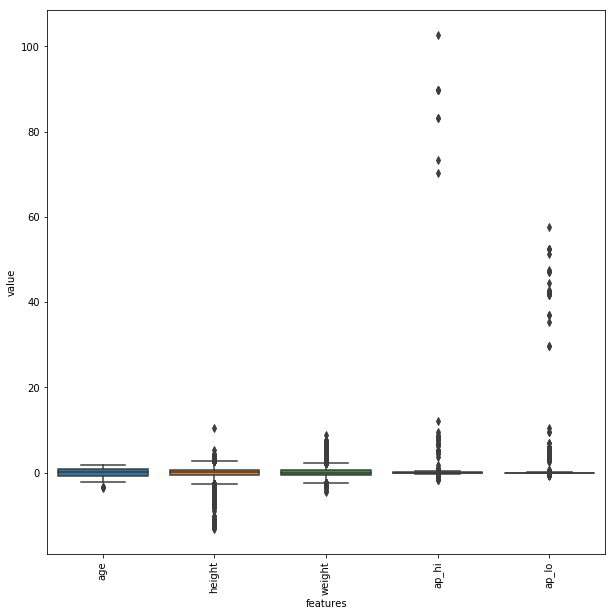

In [15]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", data=x_melted)
plt.xticks(rotation=90)

In [16]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # We created an empty dataframe
for each in ap_list:
    Q1 = x[each].quantile(0.25)
    Q3 = x[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [17]:
ap_hi_filter = (x["ap_hi"] > boundary["ap_hi"][1])
ap_lo_filter = (x["ap_lo"] > boundary["ap_lo"][1])                                                           
outlier_filter = (ap_hi_filter | ap_lo_filter)
x_outliers = x[outlier_filter]
x_outliers["cardio"].value_counts()

1    1999
0     385
Name: cardio, dtype: int64

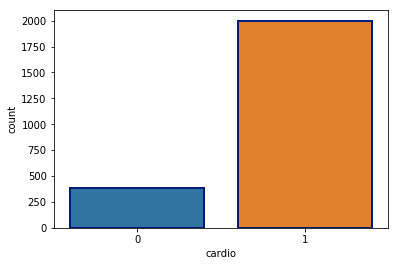

In [18]:
sns.countplot(x='cardio',data=x_outliers,linewidth=2,edgecolor=sns.color_palette("dark", 1))

In [19]:
out_filter = ((x["ap_hi"]>250) | (x["ap_lo"]>200) )
print("There is {} outlier".format(x[out_filter]["cardio"].count()))


There is 983 outlier


In [20]:
x = x[~out_filter]

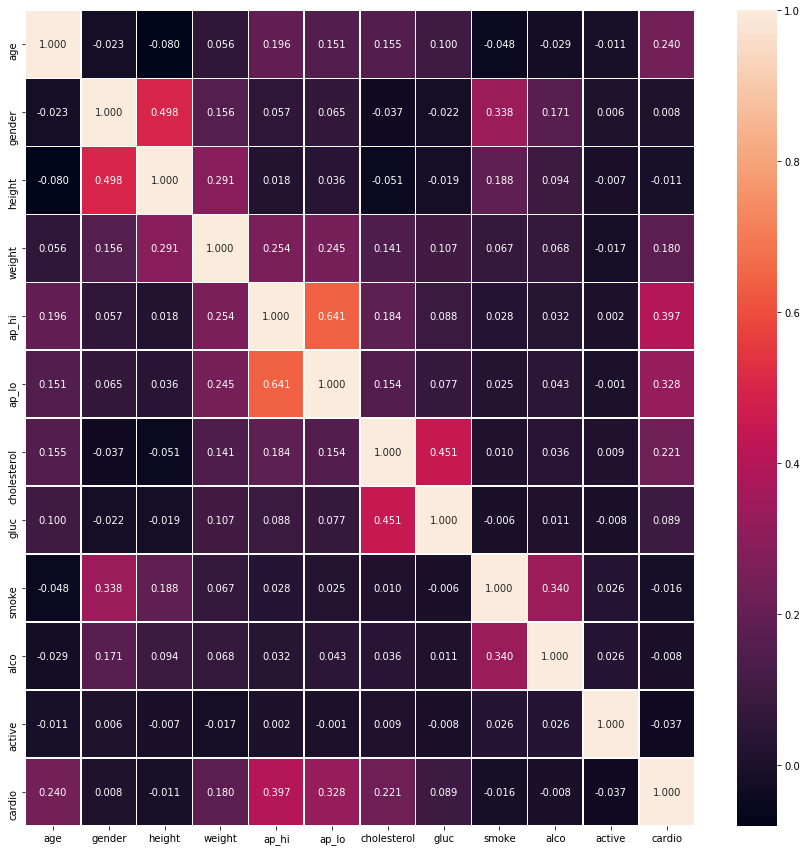

In [21]:
corr = x.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [22]:
x["bmi"] = x["weight"]/ (x["height"]/100)**2

In [23]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,22469,1,155,69.0,130,80,2,2,0,0,1,0,28.720083
1,14648,1,163,71.0,110,70,1,1,0,0,1,1,26.722873
2,21901,1,165,70.0,120,80,1,1,0,0,1,0,25.711662
3,14549,2,165,85.0,120,80,1,1,1,1,1,0,31.221304
4,23393,1,155,62.0,120,80,1,1,0,0,1,0,25.806452


In [24]:
a = x[x["gender"]==1]["height"].mean()
b = x[x["gender"]==2]["height"].mean()
if a > b:
    gender = "male"
    gender2 = "female"
else:
    gender = "female"
    gender2 = "male"
print("Gender:1 is "+ gender +" & Gender:2 is " + gender2)

Gender:1 is female & Gender:2 is male


In [25]:
x["gender"] = x["gender"] % 2

(array([0, 1]), <a list of 2 Text xticklabel objects>)

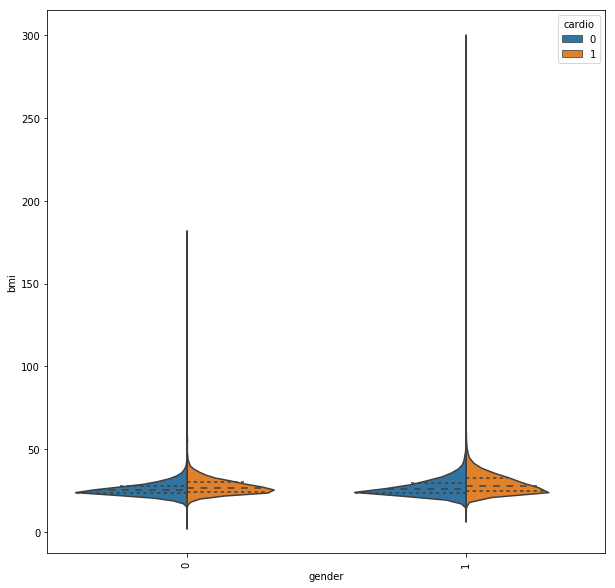

In [26]:
from sklearn.preprocessing import StandardScaler
x_std = standartization(x)

data = pd.melt(x_std,id_vars="cardio",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="gender", y="bmi", hue="cardio", data=x,split=True, inner="quart")
plt.xticks(rotation=90)

In [27]:
y = x["cardio"]
y.shape

(68294,)

In [28]:
x.drop("cardio", axis=1,inplace=True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,22469,1,155,69.0,130,80,2,2,0,0,1,28.720083
1,14648,1,163,71.0,110,70,1,1,0,0,1,26.722873
2,21901,1,165,70.0,120,80,1,1,0,0,1,25.711662
3,14549,0,165,85.0,120,80,1,1,1,1,1,31.221304
4,23393,1,155,62.0,120,80,1,1,0,0,1,25.806452


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

dec = DecisionTreeClassifier()
ran = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
naive = GaussianNB()
xgb=XGBClassifier(n_estimators=100)

models = {"Decision tree" : dec,
          "Random forest" : ran,
          "KNN" : knn,
          "SVM" : svm,
          "Naive bayes" : naive,
         "XGboost" : xgb}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [32]:
scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
scores_frame.sort_values(by=["Accuracy Score"], axis=0 ,ascending=False, inplace=True)
scores_frame

,Accuracy Score
XGboost,0.737096
Random forest,0.712863
Naive bayes,0.712058
KNN,0.705396
Decision tree,0.634234
SVM,0.606853


In [33]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=100)
accuracies_random_forest = cross_val_score(estimator=ran, X=x_train, y=y_train, cv=10)
accuracies_knn = cross_val_score(estimator=knn, X=x_train, y=y_train, cv=10)

In [34]:
print("Random Forest Average accuracy: ", accuracies_random_forest.mean())
print("Random Forest Standart Deviation: ", accuracies_random_forest.std())
print("KNN Average accuracy: ", accuracies_knn.mean())
print("KNN Standart Deviation: ", accuracies_knn.std())

Random Forest Average accuracy:  0.7109728356260095
Random Forest Standart Deviation:  0.0049505067022663825
KNN Average accuracy:  0.6992403642338757
KNN Standart Deviation:  0.005538180165802029


In [35]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}

ran_cv = GridSearchCV(ran, grid, cv=3) # GridSearchCV
ran_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(ran_cv.best_params_)) 
print("Best score: {}".format(ran_cv.best_score_))
print("")

Tuned hyperparameter n_estimators: {'n_estimators': 140}
Best score: 0.7138281456936483


In [39]:
# grid search cross validation with 1 hyperparameter
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators" : np.arange(10,150,10)}

xgb_cv = GridSearchCV(xgb, grid, cv=3) # GridSearchCV
xgb_cv.fit(x_train,y_train)# Fit

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(xgb_cv.best_params_)) 
print("Best score: {}".format(xgb_cv.best_score_))

Tuned hyperparameter n_estimators: {'n_estimators': 110}
Best score: 0.7335224841901645


In [36]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", max_iter=200)
grid = {"penalty" : ["l1", "l2"],
         "C" : np.arange(60,80,2)} # (60,62,64 ... 78)
log_reg_cv = GridSearchCV(log_reg, grid, cv=3)
log_reg_cv.fit(x_train, y_train)

# Print hyperparameter
print("Tuned hyperparameter n_estimators: {}".format(log_reg_cv.best_params_)) 
print("Best score: {}".format(log_reg_cv.best_score_))

Tuned hyperparameter n_estimators: {'C': 72, 'penalty': 'l1'}
Best score: 0.7251029772374574


In [42]:
import pickle
pickle_out = open("xgb_classifier.pkl","wb")
pickle.dump(xgb_cv, pickle_out)
pickle_out.close()

In [38]:
n = 3
list_1 = [1, 2, 3, 4, 5, 6] 
list_1 = (list_1[-n:] + list_1[:-n]) 
  
print(list_1) 

[4, 5, 6, 1, 2, 3]


3.6.3
